<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/WoE_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"
     

/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=P2okS4euPOy8VFaSUWpA5aHbfzu29BKyGx%2FXNmzBD28'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fww

In [2]:
%cd /content/gdrive/My Drive/Data/

/content/gdrive/My Drive/Data


In [4]:
!pip install git+https://github.com/CBravoR/scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/CBravoR/scorecardpy to /tmp/pip-req-build-xsptxodi
  Running command git clone --filter=blob:none --quiet https://github.com/CBravoR/scorecardpy /tmp/pip-req-build-xsptxodi
  Resolved https://github.com/CBravoR/scorecardpy to commit 03ec28470391e5c950580ad9ac4877ca33f05fce
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.3-py3-none-any.whl size=59549 sha256=bfbd24ee5a20d81ffd537541eaa9626ab9dbd909be871caf1954498e8e70e22c
  Stored in directory: /tmp/pip-ephem-wheel-cache-f1woryap/wheels/61/36/7f/76fa329f36d896910f2251f5cfd54094c722e088b633e47f6f
Successfully built scorecardpy


In [5]:
import scorecardpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline
random.seed(251256517)

In [6]:
df_train = pd.read_csv("train_mean.csv",index_col=0, low_memory=False)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896430 entries, 0 to 1280645
Data columns (total 75 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              896430 non-null  int64  
 1   loan_amnt                       896430 non-null  float64
 2   funded_amnt                     896430 non-null  float64
 3   funded_amnt_inv                 896430 non-null  float64
 4   term                            896430 non-null  object 
 5   installment                     896430 non-null  float64
 6   home_ownership                  896430 non-null  object 
 7   purpose                         896430 non-null  object 
 8   zip_code                        896430 non-null  object 
 9   addr_state                      896430 non-null  object 
 10  dti                             896430 non-null  float64
 11  delinq_2yrs                     896430 non-null  float64
 12  earliest_cr_lin

In [8]:
df_train.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,home_ownership,purpose,zip_code,addr_state,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Default,bank_dlq,il_acc,payment_history,collateral_coverage_ratio
0,68355089,24700.0,24700.0,24700.0,36 months,820.28,MORTGAGE,small_business,577xx,SD,...,0.0,314017.0,39475.0,79300.0,24667.0,0,0,1,0.631895,0.998664
1,68341763,20000.0,20000.0,20000.0,60 months,432.66,MORTGAGE,home_improvement,605xx,IL,...,0.0,218418.0,18696.0,6200.0,14877.0,0,0,1,0.888889,0.743850
5,68338832,1400.0,1400.0,1400.0,36 months,47.10,MORTGAGE,other,275xx,NC,...,0.0,372109.0,75258.0,34500.0,55501.0,0,0,1,0.666667,39.643571
6,66624733,18000.0,18000.0,18000.0,60 months,471.70,RENT,debt_consolidation,916xx,CA,...,0.0,65819.0,36247.0,10300.0,31319.0,1,0,1,0.740741,1.739944
8,68009401,16000.0,16000.0,16000.0,60 months,379.39,MORTGAGE,credit_card,297xx,SC,...,2.0,298100.0,31329.0,281300.0,13400.0,0,1,1,0.367947,0.837500


In [ ]:
print(df_train.dtypes)

In [ ]:
df_train['home_ownership']. unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

## **Splitting Variables into Groups:**

In [19]:
# Group 1 
group1_vars = ['loan_amnt', 'term', 'installment', 'home_ownership', 'annual_inc_joint']

# Group 2
group2_vars = ['purpose', 'dti']

# Group 3
group3_vars = ['delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths']

# Group 4
group4_vars = ['open_acc', 'pub_rec', 'revol_bal','revol_util', 'total_acc']

# List of the first 20 variables
first_20_vars = ['loan_amnt', 'term', 'installment', 'home_ownership', 'annual_inc_joint',  
                 'purpose', 'dti', 
                 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 
                 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']


## **DATA VISUALIZATION:**

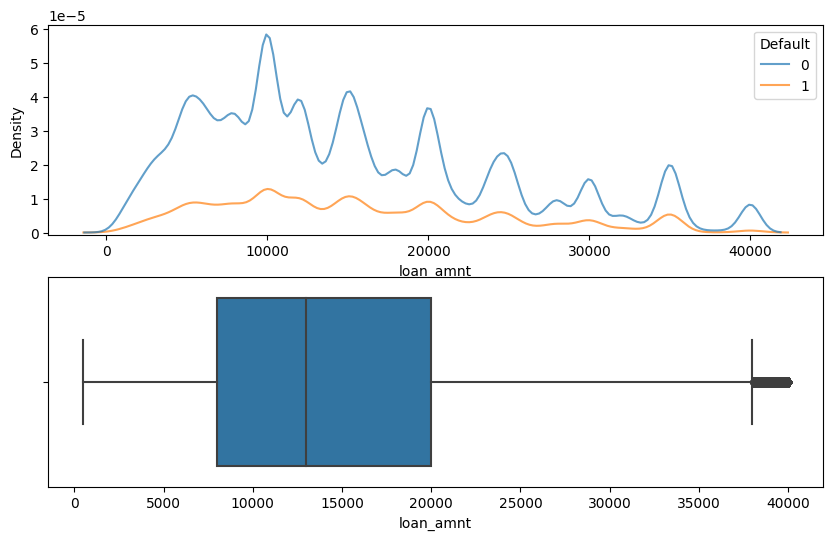

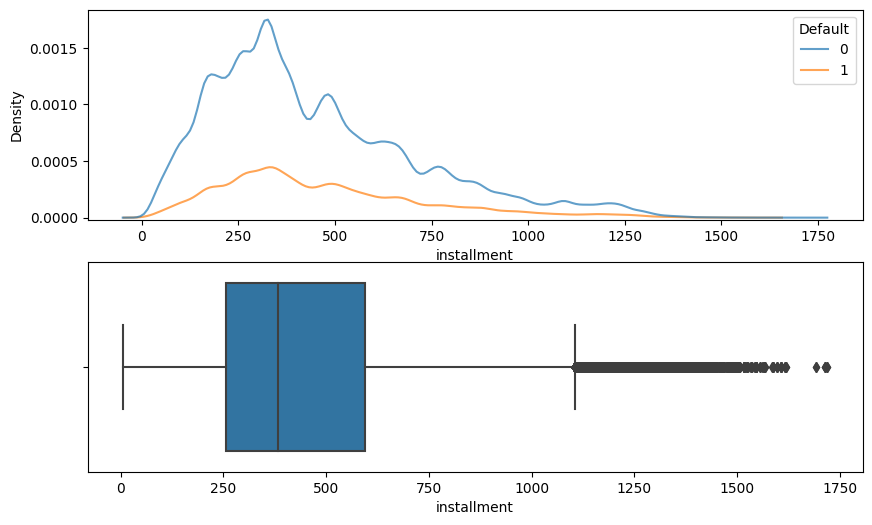

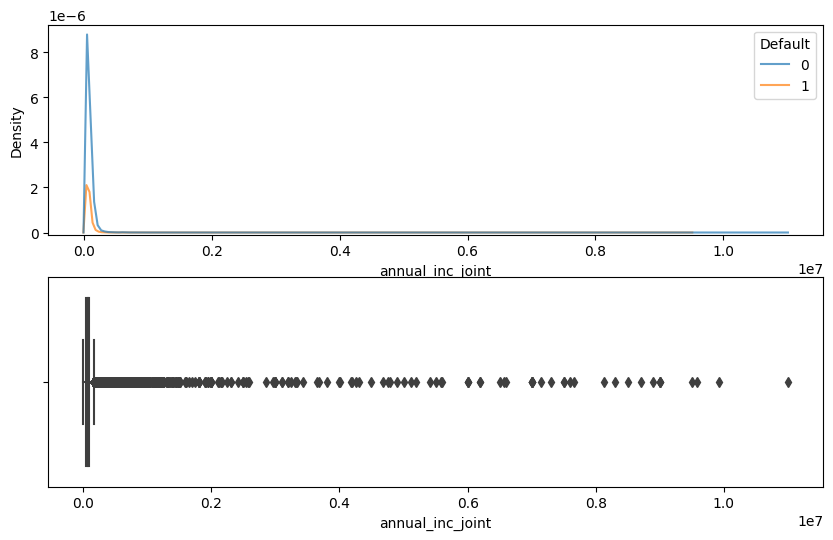

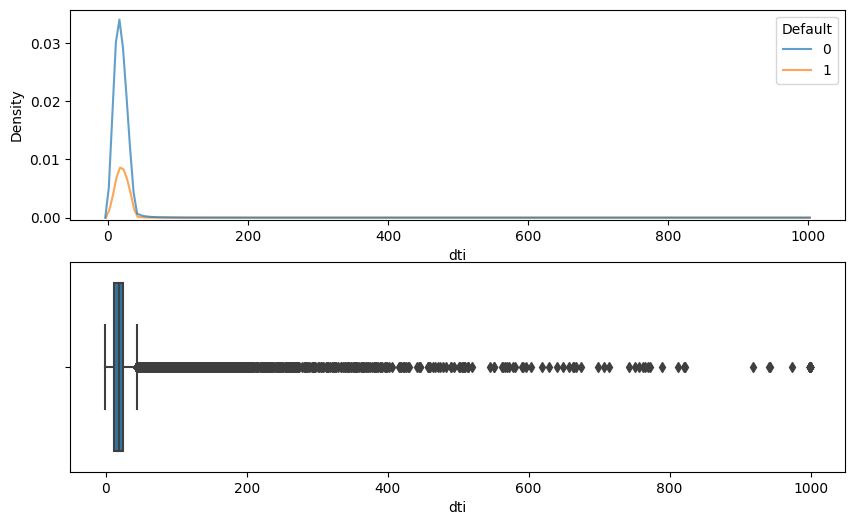

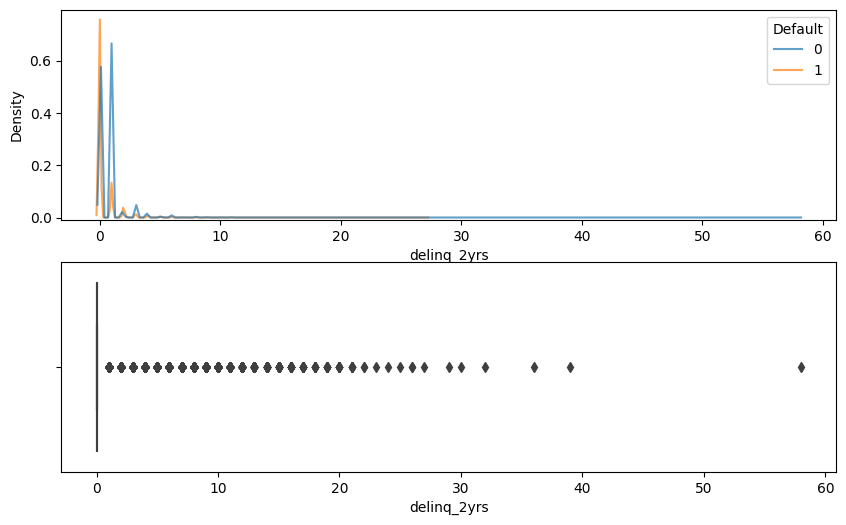

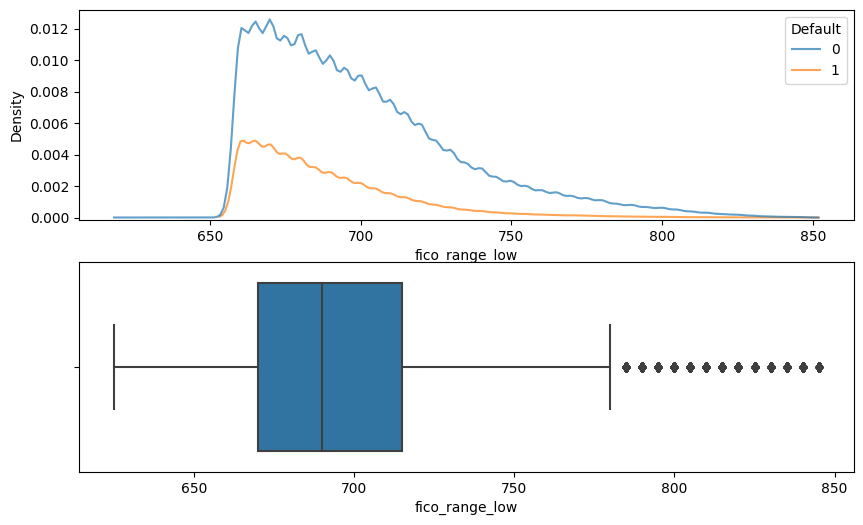

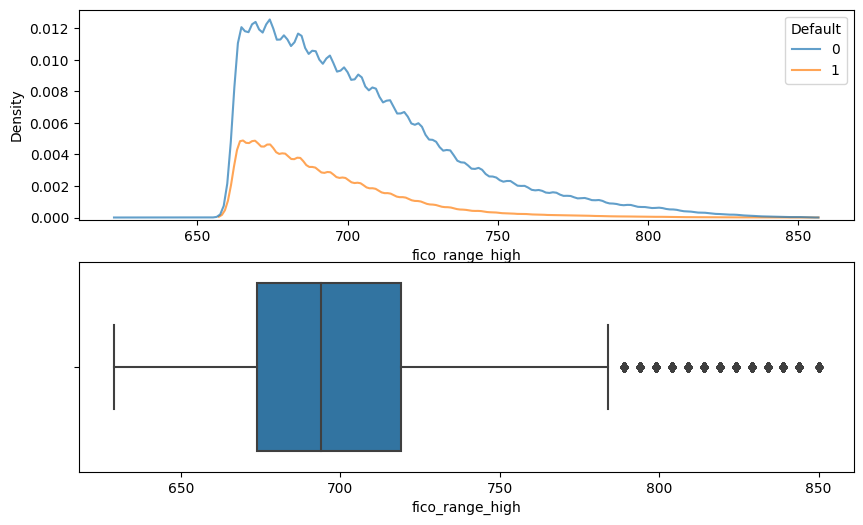

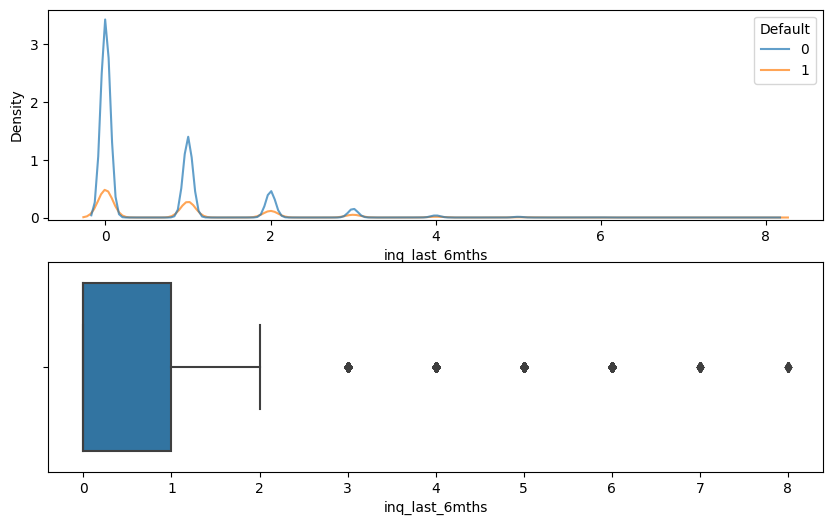

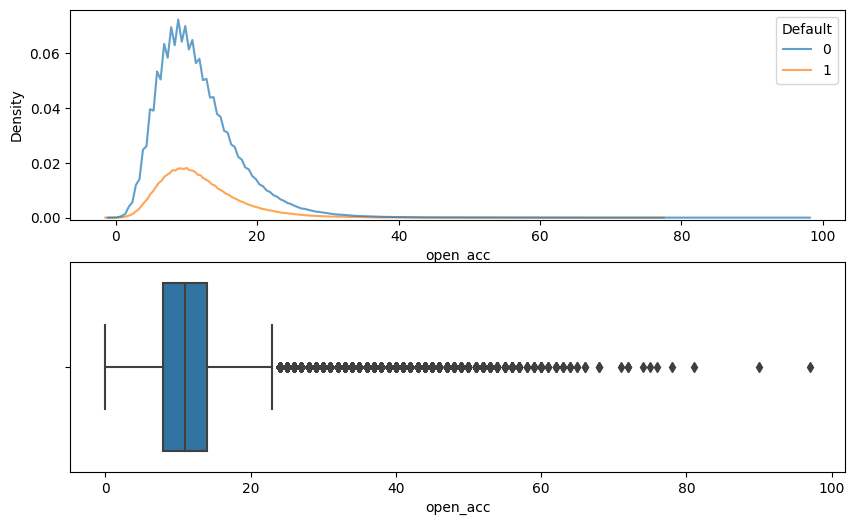

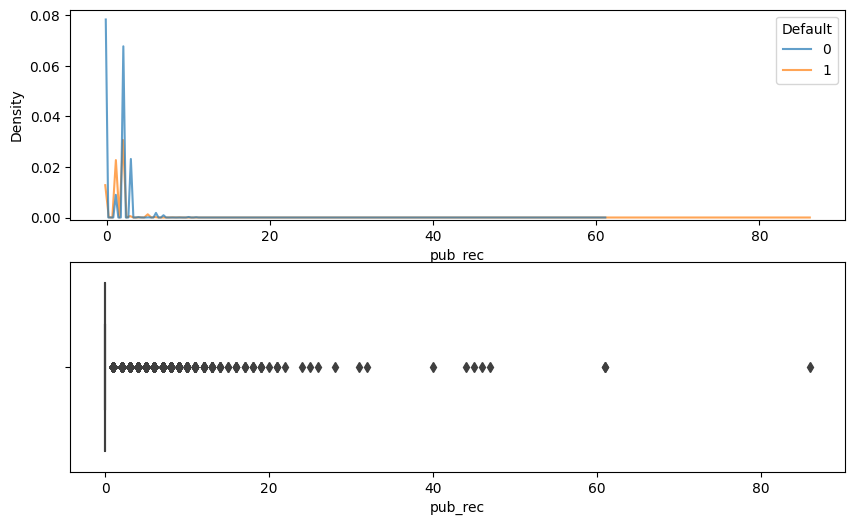

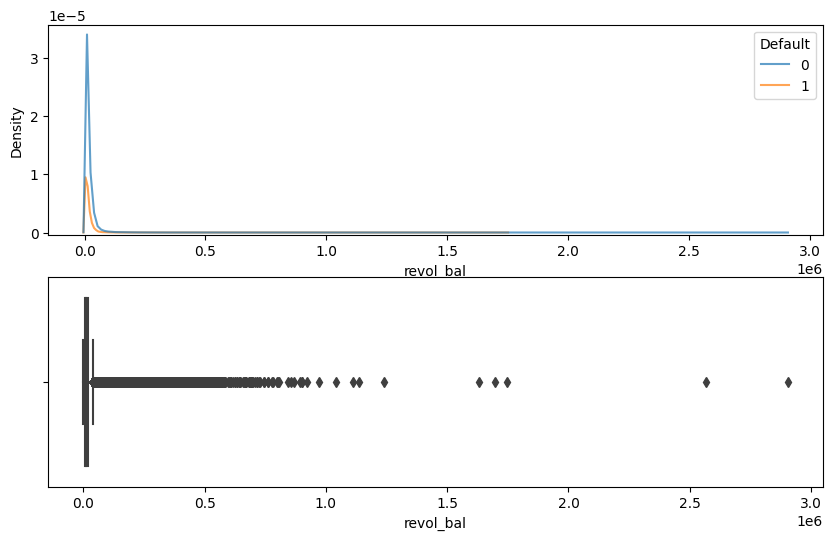

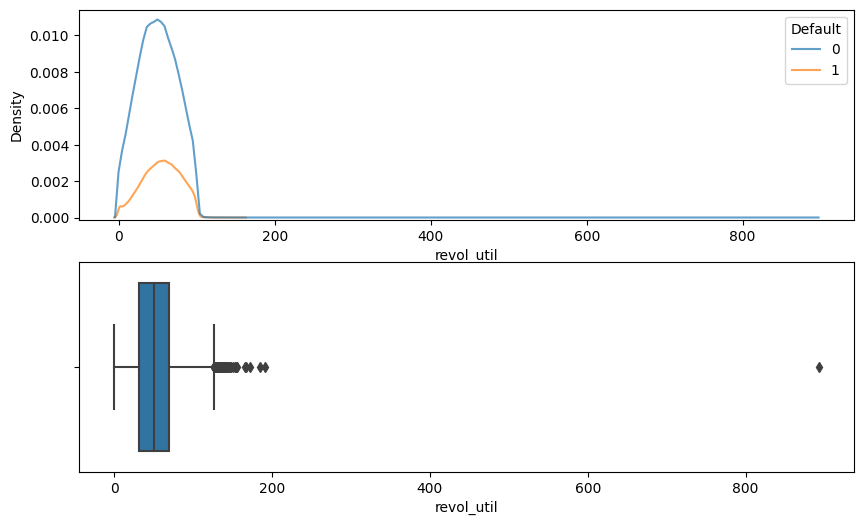

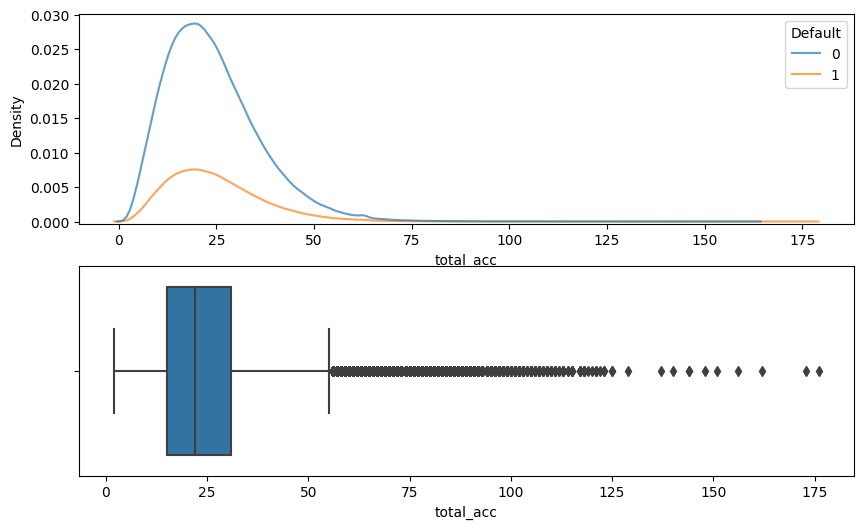

In [14]:
# Filter the first 20 variables by numerical columns only
# num_list = [col for col in first_20_vars if df_train[col].dtype in ['float64', 'int64']]

for var in first_20_vars:
    if df_train[var].dtype in ['float64', 'int64']:
      fig, g = plt.subplots(2, 1, figsize=(10, 6))
      sns.kdeplot(data=df_train, x=var, hue="Default", alpha=0.7, ax=g[0])
      ymin, ymax = g[0].get_ylim()
      g[0].set_ylim(ymin=ymin - (ymax / 100), ymax=ymax)
      sns.boxplot(data=df_train, x=var, ax=g[1])
      plt.show()

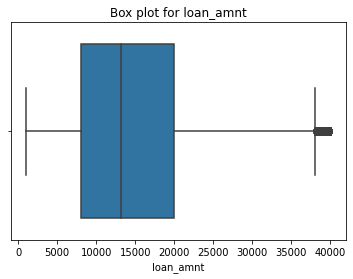

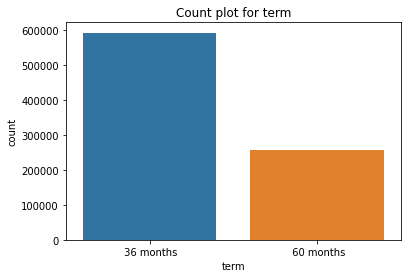

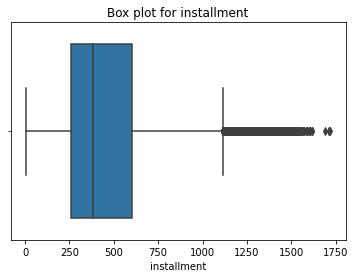

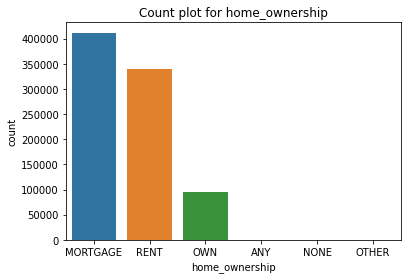

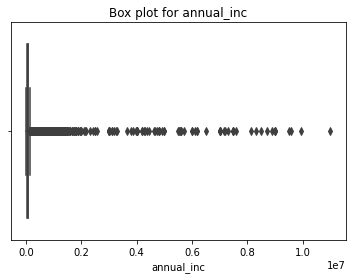

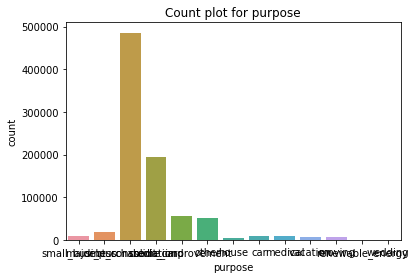

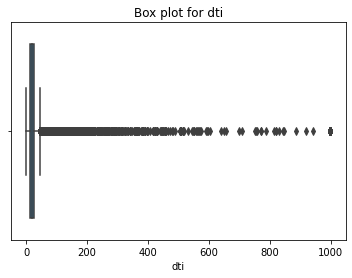

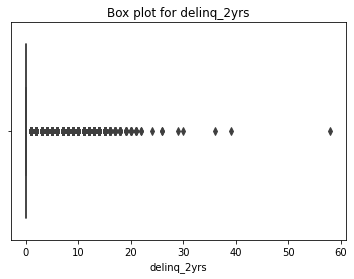

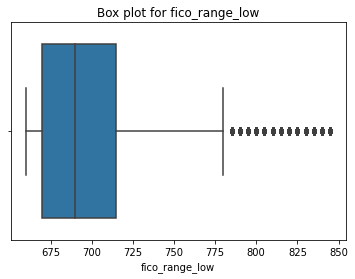

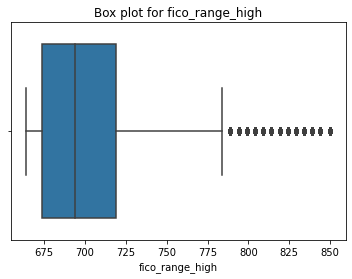

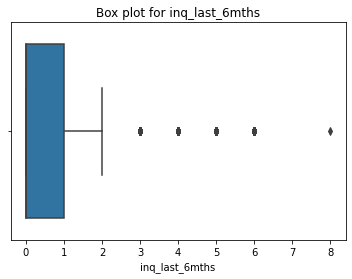

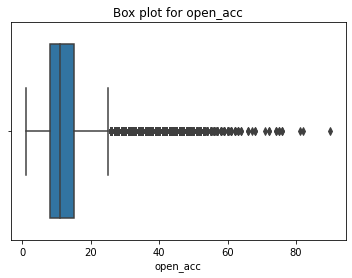

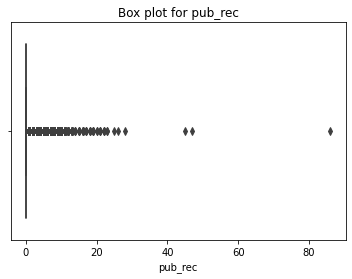

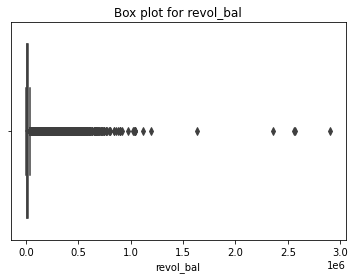

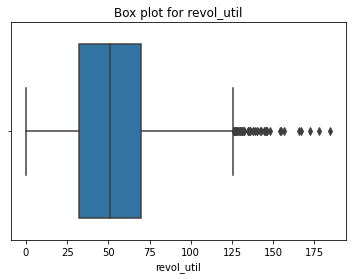

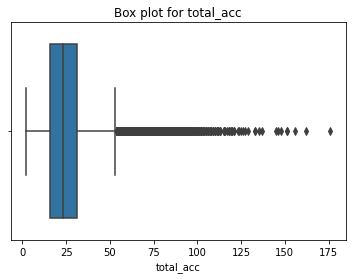

In [ ]:
for var in first_20_vars:
    if df_train[var].dtype in ['float64', 'int64']:
        plt.figure()
        sns.boxplot(x=df_train[var])
        plt.title(f'Box plot for {var}')
    else:
        plt.figure()
        sns.countplot(x=df_train[var])
        plt.title(f'Count plot for {var}')
    plt.show()

In [15]:
def preprocess_data(df):
    # Convert non-numeric columns to string
    non_numeric_cols = df.select_dtypes(include=['object']).columns
    df[non_numeric_cols] = df[non_numeric_cols].astype('str')

    # Convert numeric columns to float and replace NaNs with a suitable value
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].astype('float64')
    df[numeric_cols] = df[numeric_cols].fillna(-999999)

    return df


In [17]:
df_train_preprocessed = preprocess_data(df_train.copy())

## **WoE Calculations BEFORE outlier analysis:**

In [20]:
bins = sc.woebin(df_train_preprocessed, y='Default',
                 x=group1_vars,  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...
Binning on 896430 rows and 6 columns in 00:00:34


{'loan_amnt': <Figure size 640x480 with 2 Axes>,
 'term': <Figure size 640x480 with 2 Axes>,
 'installment': <Figure size 640x480 with 2 Axes>,
 'home_ownership': <Figure size 640x480 with 2 Axes>,
 'annual_inc_joint': <Figure size 640x480 with 2 Axes>}

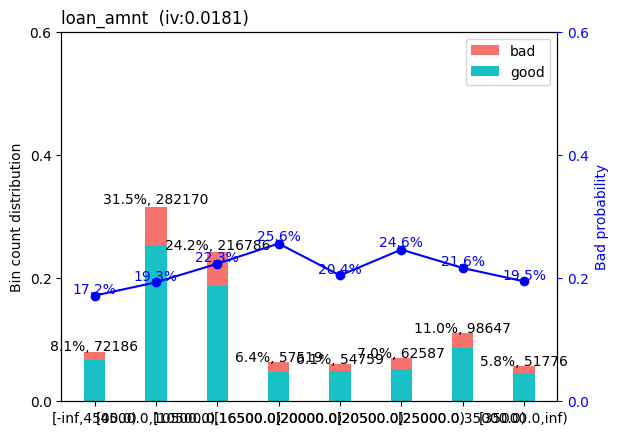

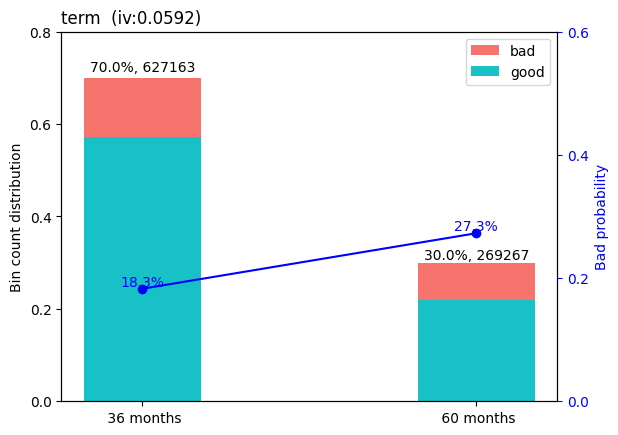

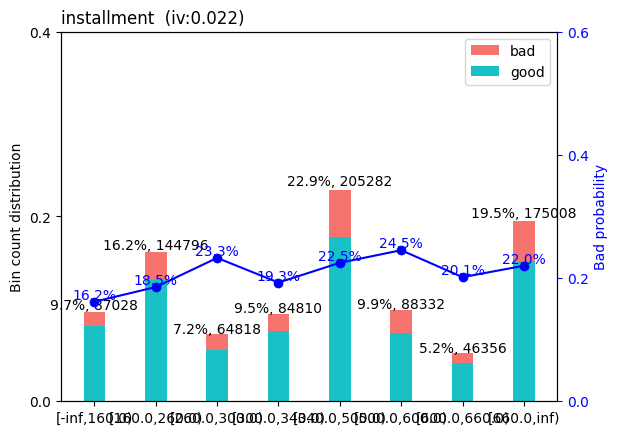

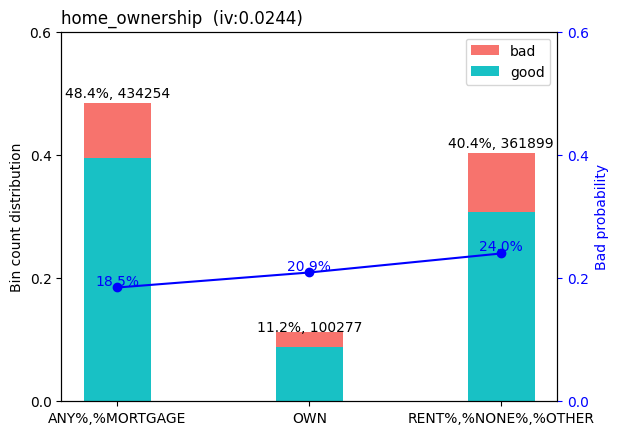

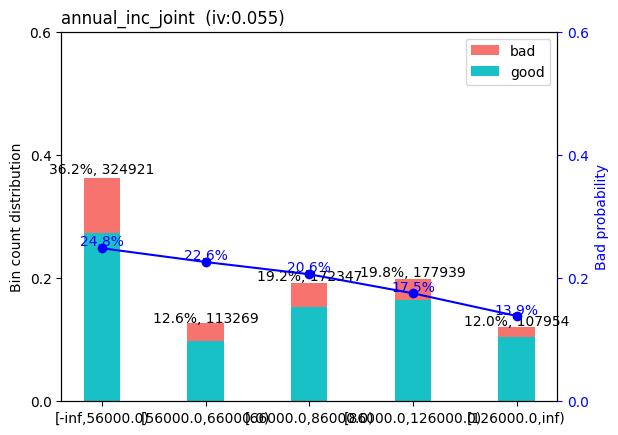

In [21]:
import seaborn as sns

sc.woebin_plot(bins)

In [22]:
bins2 = sc.woebin(df_train_preprocessed, y='Default',
                 x=group2_vars,  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...
Binning on 896430 rows and 3 columns in 00:00:15


{'purpose': <Figure size 640x480 with 2 Axes>,
 'dti': <Figure size 640x480 with 2 Axes>}

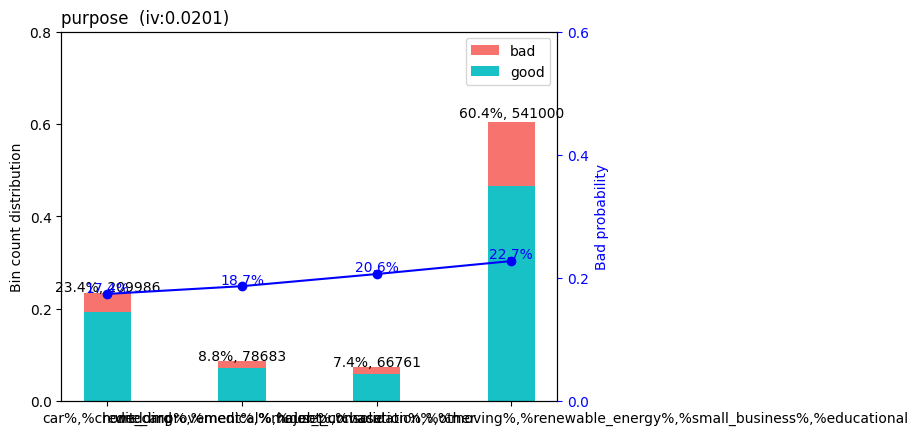

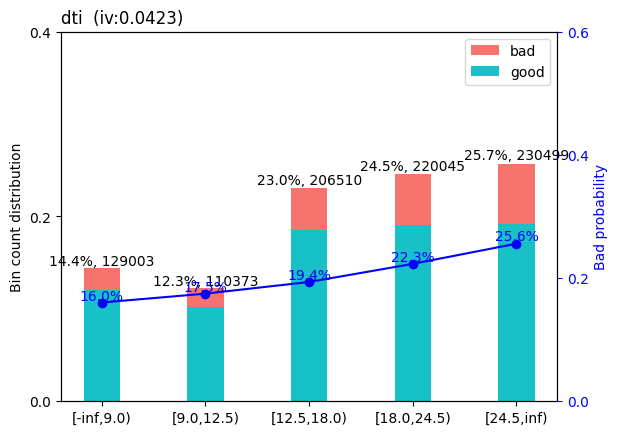

In [23]:
sc.woebin_plot(bins2)

In [24]:
bins3 = sc.woebin(df_train_preprocessed, y='Default',
                 x=group3_vars,  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...


/usr/local/lib/python3.9/dist-packages/scorecardpy/condition_fun.py:28: UserWarning: There are 1 date/time type columns are removed from input dataset. 
 (ColumnNames: earliest_cr_line)
  warnings.warn("There are {} date/time type columns are removed from input dataset. \n (ColumnNames: {})".format(len(datetime_cols), ', '.join(datetime_cols)))
/usr/local/lib/python3.9/dist-packages/scorecardpy/condition_fun.py:161: UserWarning: Incorrect inputs; there are 1 x variables are not exist in input data, which are removed from x. 
(earliest_cr_line)
  warnings.warn("Incorrect inputs; there are {} x variables are not exist in input data, which are removed from x. \n({})".format(len(x_notin_xall), ', '.join(x_notin_xall)))


Binning on 896430 rows and 5 columns in 00:00:24


{'inq_last_6mths': <Figure size 640x480 with 2 Axes>,
 'delinq_2yrs': <Figure size 640x480 with 2 Axes>,
 'fico_range_high': <Figure size 640x480 with 2 Axes>,
 'fico_range_low': <Figure size 640x480 with 2 Axes>}

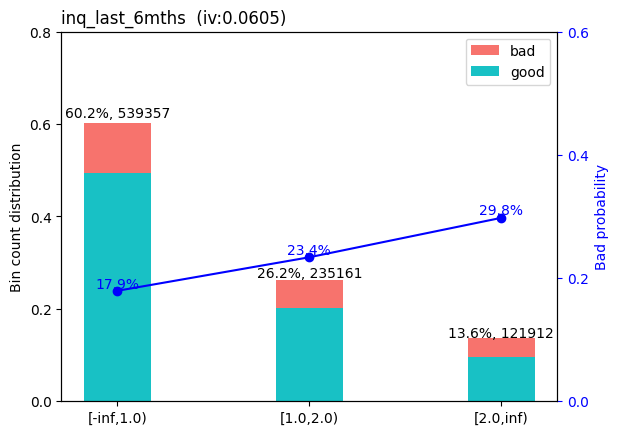

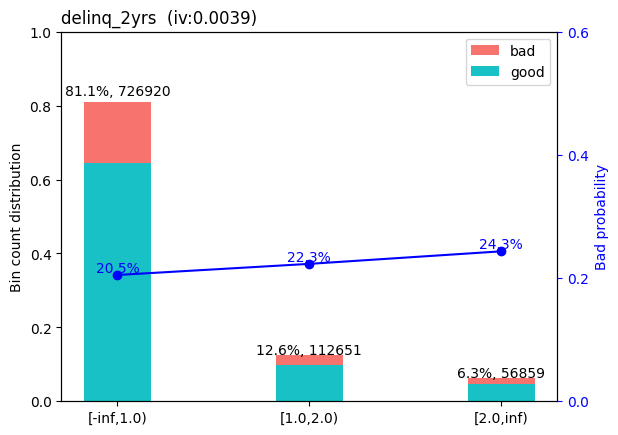

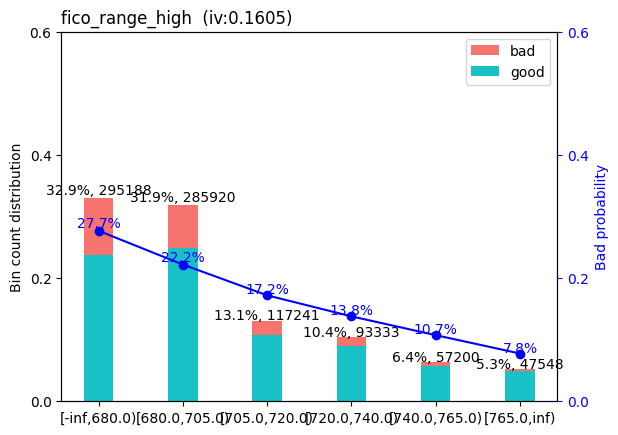

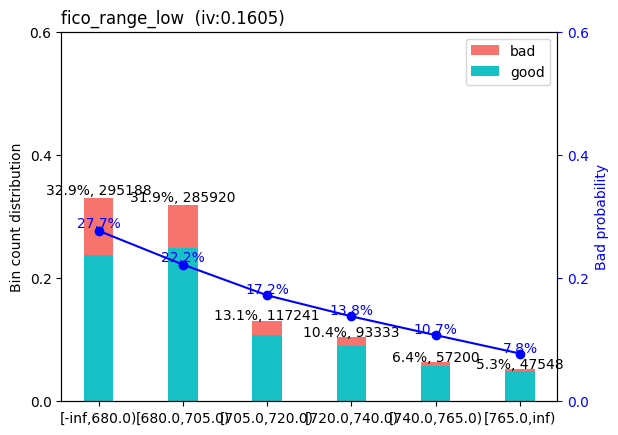

In [25]:
sc.woebin_plot(bins3)

In [26]:
bins4 = sc.woebin(df_train_preprocessed, y='Default',
                 x=group4_vars,  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.1,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=3,  # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...
Binning on 896430 rows and 6 columns in 00:00:39


{'open_acc': <Figure size 640x480 with 2 Axes>,
 'pub_rec': <Figure size 640x480 with 2 Axes>,
 'revol_bal': <Figure size 640x480 with 2 Axes>,
 'revol_util': <Figure size 640x480 with 2 Axes>,
 'total_acc': <Figure size 640x480 with 2 Axes>}

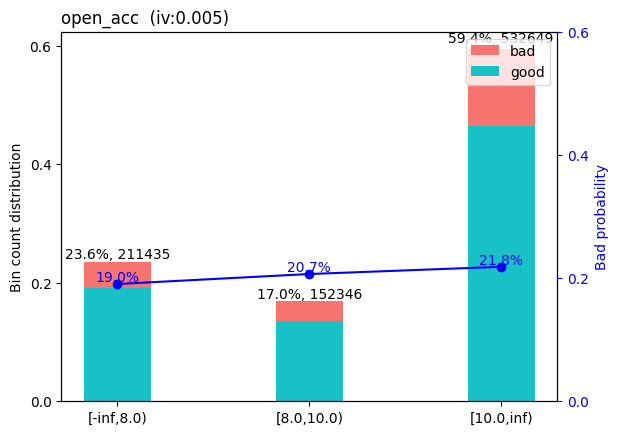

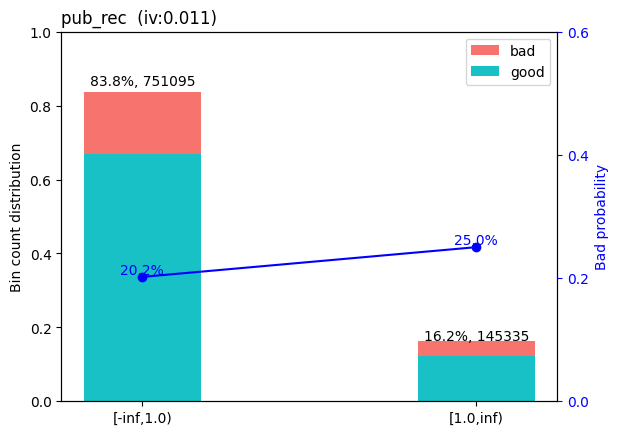

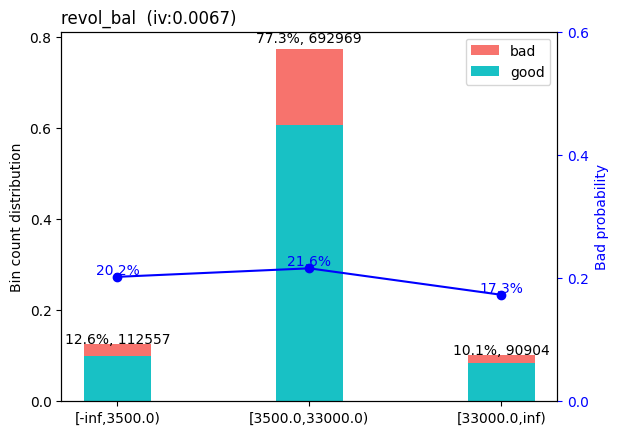

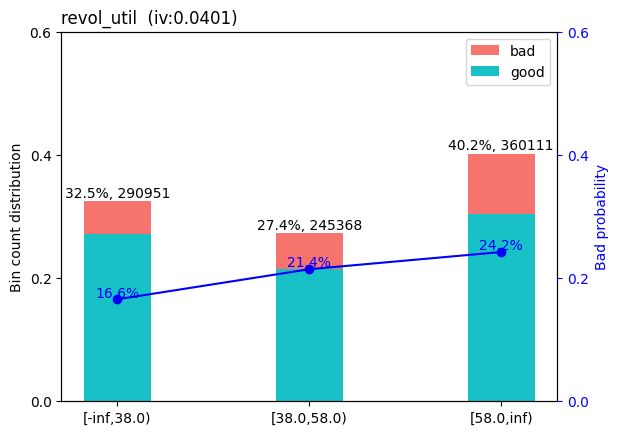

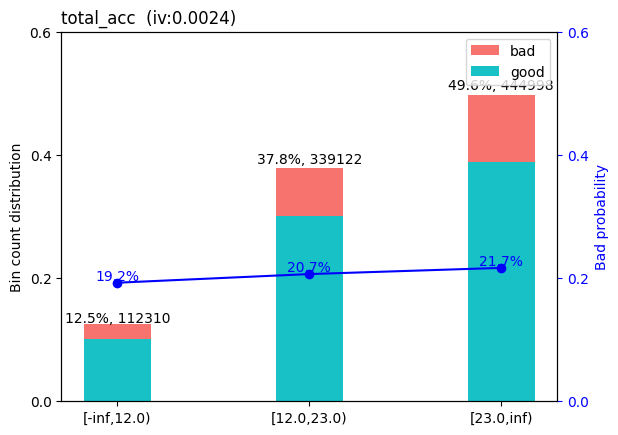

In [27]:
sc.woebin_plot(bins4)

## **WoE Calculations AFTER outlier analysis:**

In [ ]:
bins_no = sc.woebin(df_train_preprocessed_NO, y='Default',
                 x=first_20_vars,  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...
Binning on 735649 rows and 17 columns in 00:01:30


{'loan_amnt': <Figure size 432x288 with 2 Axes>,
 'term': <Figure size 432x288 with 2 Axes>,
 'installment': <Figure size 432x288 with 2 Axes>,
 'home_ownership': <Figure size 432x288 with 2 Axes>,
 'annual_inc': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>,
 'dti': <Figure size 432x288 with 2 Axes>,
 'delinq_2yrs': <Figure size 432x288 with 2 Axes>,
 'fico_range_low': <Figure size 432x288 with 2 Axes>,
 'fico_range_high': <Figure size 432x288 with 2 Axes>,
 'inq_last_6mths': <Figure size 432x288 with 2 Axes>,
 'open_acc': <Figure size 432x288 with 2 Axes>,
 'pub_rec': <Figure size 432x288 with 2 Axes>,
 'revol_bal': <Figure size 432x288 with 2 Axes>,
 'revol_util': <Figure size 432x288 with 2 Axes>,
 'total_acc': <Figure size 432x288 with 2 Axes>}

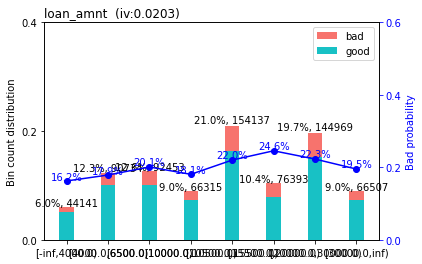

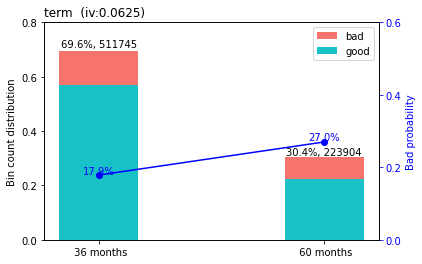

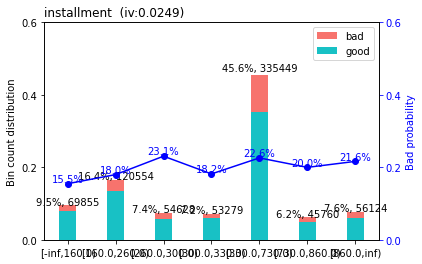

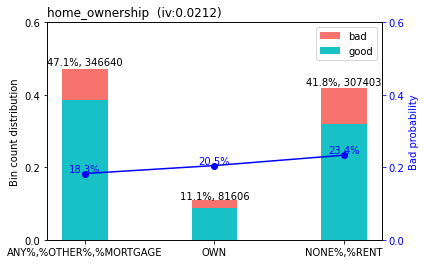

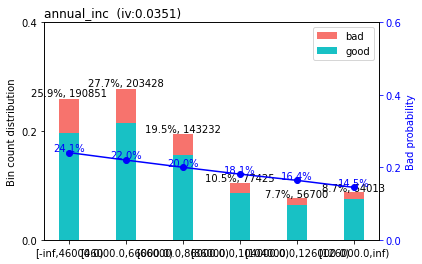

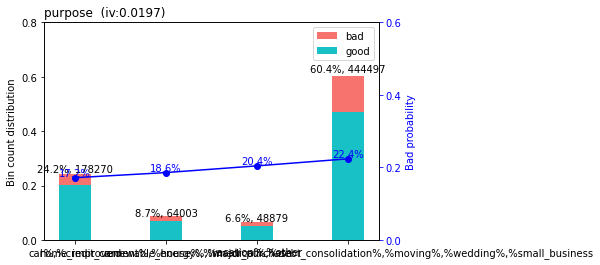

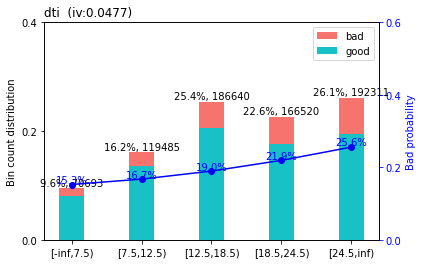

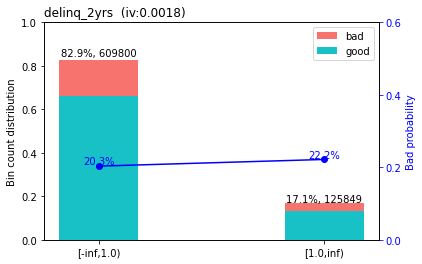

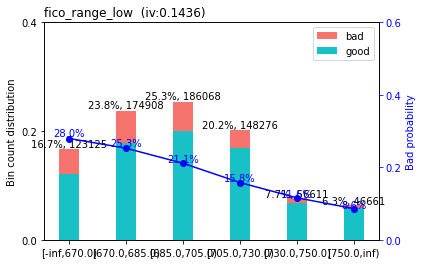

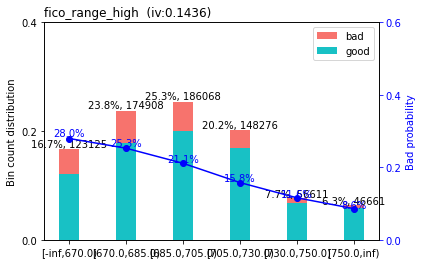

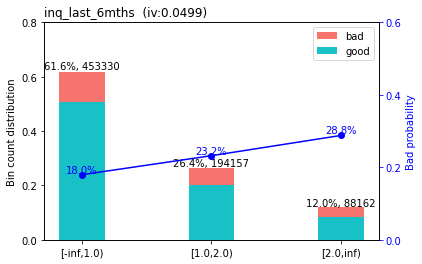

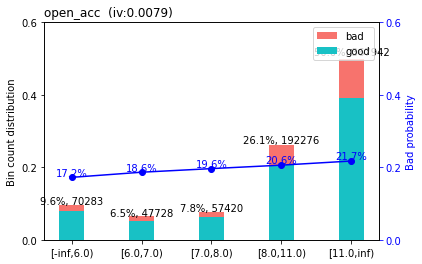

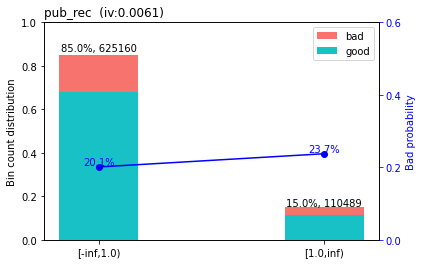

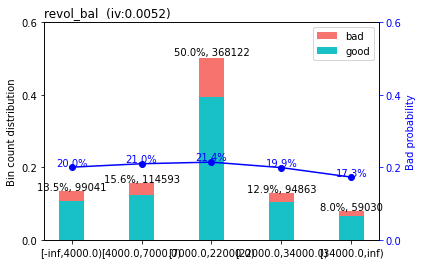

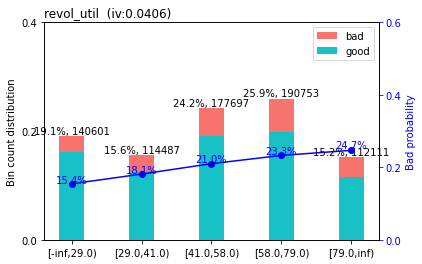

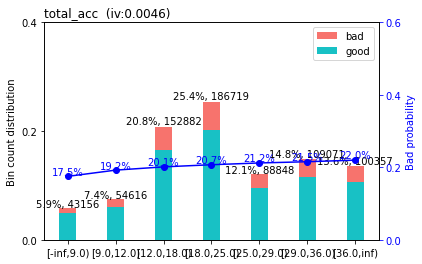

In [ ]:
sc.woebin_plot(bins_no)

In [ ]:
breaks_adj = sc.woebin_adj(df_train_no_outliers, "Default", bins_no, adj_all_var=True)

## **ADDING NEW VARIABLES:**

In [ ]:
df_train['utilization_per_open_acc'] = df_train['revol_util'] / df_train['open_acc']
df_train['prop_recent_open_acc'] = df_train['acc_open_past_24mths'] / df_train['total_acc']
df_train['prop_active_rev_acc'] = df_train['num_actv_rev_tl'] / df_train['open_acc']
df_train['loan_to_income_ratio'] = df_train['loan_amnt'] / df_train['annual_inc']
df_train['inq_to_recent_open_acc'] = df_train['inq_last_6mths'] / df_train['acc_open_past_24mths']
df_train['utilization_per_open_acc'] = df_train['revol_util'] / df_train['open_acc']

In [ ]:
new_vars = ['utilization_per_open_acc','prop_recent_open_acc','prop_active_rev_acc','loan_to_income_ratio','utilization_per_open_acc', 'dti_per_open_acc', 'inq_to_recent_open_acc']

In [ ]:
bins_trial = sc.woebin(df_train, y='Default',
                 x='loan_to_income_ratio',  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...
Binning on 848276 rows and 2 columns in 00:00:17


{'loan_to_income_ratio': <Figure size 432x288 with 2 Axes>}

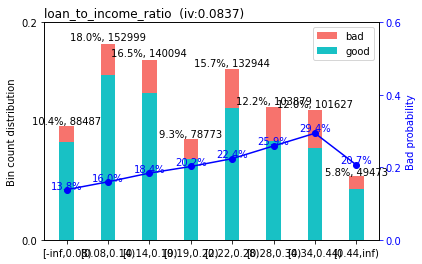

In [ ]:
sc.woebin_plot(bins_trial)

In [ ]:
# Select only numeric columns
numeric_columns = df_train.select_dtypes(include=np.number).columns

# Calculate correlation for numeric columns
correlation_matrix = df_train[numeric_columns].corr()
correlation_with_default = correlation_matrix['Default'].sort_values(ascending=False)

# Print correlations with 'Default'
print(correlation_with_default)


Default                       1.000000
acc_open_past_24mths          0.114895
inq_last_6mths                0.105833
prop_recent_open_acc          0.094468
percent_bc_gt_75              0.093828
bc_util                       0.090949
revol_util                    0.080652
mths_since_recent_inq         0.073785
num_actv_rev_tl               0.064411
num_rev_tl_bal_gt_0           0.063397
prop_active_rev_acc           0.056551
inq_to_recent_open_acc        0.047366
dti                           0.044489
pub_rec                       0.040830
pub_rec_bankruptcies          0.033300
num_op_rev_tl                 0.032329
installment                   0.031738
num_rev_accts                 0.030993
num_actv_bc_tl                0.030488
open_acc                      0.026211
num_sats                      0.025460
total_acc                     0.024499
loan_amnt                     0.023802
bank_dlq                      0.023741
delinq_2yrs                   0.023401
num_bc_tl                